### 1. Autoencoder

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow_datasets as tfds
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
tfkl = tfk.layers

In [2]:
# load data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [3]:
# pre-processing
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
#autoencoder

autoencoder = tfk.Sequential()
autoencoder.add(tfkl.Conv2D(32, kernel_size = 3,activation='relu', padding='same',input_shape=(32,32,3)))
autoencoder.add(tfkl.Conv2D(32, kernel_size = 3,activation='relu', padding='same'))
autoencoder.add(tfkl.Conv2D(32, kernel_size = 3,activation='relu', padding='same'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.MaxPooling2D((2, 2), padding='same'))
autoencoder.add(tfkl.Conv2D(32, kernel_size = 3,activation='relu', padding='same'))
autoencoder.add(tfkl.Conv2D(32, kernel_size = 3,activation='relu', padding='same'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.UpSampling2D((2, 2)))
autoencoder.add(tfkl.Conv2D(3,kernel_size=1, strides=1, padding='same', activation='sigmoid'))
autoencoder.summary()

#compile

autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 32)        9

In [5]:
es_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2, verbose=1, mode='auto')
results = autoencoder.fit(x_train,x_train,epochs=10,steps_per_epoch=10,batch_size=1000, callbacks = es_cb)

Epoch 1/10
10/10 [==============================] - 54s 5s/step - loss: 0.6646 - accuracy: 0.3815
Epoch 2/10
10/10 [==============================] - 54s 5s/step - loss: 0.5873 - accuracy: 0.5102
Epoch 3/10
10/10 [==============================] - 54s 5s/step - loss: 0.5751 - accuracy: 0.5542
Epoch 4/10
10/10 [==============================] - 54s 5s/step - loss: 0.5709 - accuracy: 0.6153
Epoch 5/10
10/10 [==============================] - 54s 5s/step - loss: 0.5667 - accuracy: 0.6593
Epoch 6/10
10/10 [==============================] - 54s 5s/step - loss: 0.5654 - accuracy: 0.6889
Epoch 7/10
10/10 [==============================] - 54s 5s/step - loss: 0.5643 - accuracy: 0.7069
Epoch 8/10
10/10 [==============================] - 56s 6s/step - loss: 0.5649 - accuracy: 0.7173
Epoch 9/10
10/10 [==============================] - 54s 5s/step - loss: 0.5635 - accuracy: 0.7254
Epoch 10/10
10/10 [==============================] - 54s 5s/step - loss: 0.5642 - accuracy: 0.7367


In [6]:
pred = autoencoder.predict(x_test)

In [7]:
# definition to show original image and reconstructed image
def showimg(orig, dec, num=10):
    import matplotlib.pyplot as plt
    n = num
    plt.figure(figsize=(20, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i+1)
        plt.imshow(orig[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i +1 + n)
        plt.imshow(dec[i].reshape(32, 32, 3))
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

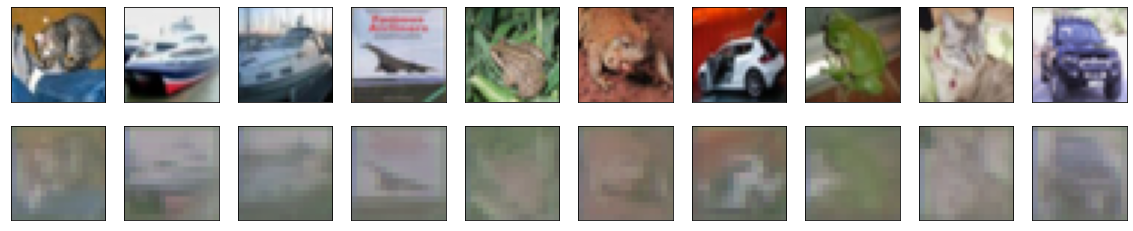

In [8]:
showimg(x_test, pred)

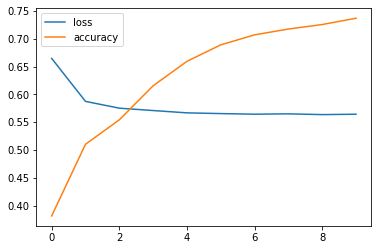

In [9]:
plt.plot(results.history['loss'])
plt.plot(results.history['accuracy'])
plt.legend(labels=['loss','accuracy'])

### 2. Image Classification

2.1 Deep CNN


In [10]:
model = tfk.models.Sequential([
    tfkl.Conv2D(64, (3,3), activation = 'relu', input_shape = (32,32,3)),
    tfkl.MaxPooling2D(2,2),
    tfkl.Dropout(0.5),
    tfkl.Conv2D(32, (3,3), activation = 'relu'),
    tfkl.MaxPooling2D(2,2),
    tfkl.Dropout(0.5),
    tfkl.Conv2D(64, (3,3), activation = 'relu'),
    tfkl.MaxPooling2D(2,2),
    tfkl.Flatten(),
    tfkl.Dense(1024, activation='sigmoid'),
    tfkl.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)         

In [11]:
model.compile(optimizer=tfk.optimizers.RMSprop(),loss='categorical_crossentropy',metrics=['accuracy'])

from keras.utils import to_categorical
y_train1 = to_categorical(y_train,10)
y_test1 = to_categorical(y_test,10)

#es_cb = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3, verbose=1, mode='auto')
results = model.fit(x_train,y_train1, steps_per_epoch=200, epochs=20, batch_size=16, validation_data=(x_test,y_test1))

Epoch 1/20
200/200 [==============================] - 12s 59ms/step - loss: 2.3153 - accuracy: 0.1388 - val_loss: 2.1238 - val_accuracy: 0.2090
Epoch 2/20
200/200 [==============================] - 12s 58ms/step - loss: 2.0812 - accuracy: 0.2294 - val_loss: 2.0560 - val_accuracy: 0.2447
Epoch 3/20
200/200 [==============================] - 12s 59ms/step - loss: 1.9557 - accuracy: 0.2819 - val_loss: 1.8847 - val_accuracy: 0.2984
Epoch 4/20
200/200 [==============================] - 12s 59ms/step - loss: 1.8746 - accuracy: 0.3066 - val_loss: 2.8265 - val_accuracy: 0.1665
Epoch 5/20
200/200 [==============================] - 12s 58ms/step - loss: 1.7946 - accuracy: 0.3269 - val_loss: 1.7707 - val_accuracy: 0.3597
Epoch 6/20
200/200 [==============================] - 12s 58ms/step - loss: 1.7428 - accuracy: 0.3700 - val_loss: 2.0168 - val_accuracy: 0.3319
Epoch 7/20
200/200 [==============================] - 11s 57ms/step - loss: 1.6833 - accuracy: 0.3806 - val_loss: 1.7017 - val_accuracy:

For this model I chose kernal size of (3,3), strides as 1, pading as default, network depth of 8

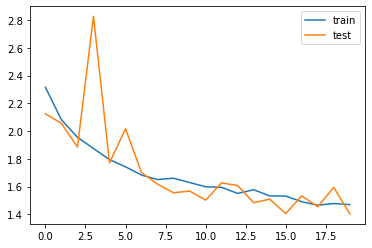

In [12]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(labels=['train','test'])

2.2 Transfer Learning


In [18]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(32, 32, 3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 0s 0us/step


In [19]:
base_model.trainable = False

global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(10)

In [20]:
inputs = tf.keras.Input(shape=(32, 32, 3))
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [21]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 2.0878 - accuracy: 0.2581 - val_loss: 1.9821 - val_accuracy: 0.3002
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.9856 - accuracy: 0.2848 - val_loss: 1.9394 - val_accuracy: 0.3092
Epoch 3/10
1563/1563 [==============================] - 77s 49ms/step - loss: 1.9646 - accuracy: 0.2898 - val_loss: 1.9242 - val_accuracy: 0.3137
Epoch 4/10
1563/1563 [==============================] - 75s 48ms/step - loss: 1.9532 - accuracy: 0.2938 - val_loss: 1.9159 - val_accuracy: 0.3151
Epoch 5/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.9479 - accuracy: 0.2964 - val_loss: 1.9110 - val_accuracy: 0.3177
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.9463 - accuracy: 0.2973 - val_loss: 1.9084 - val_accuracy: 0.3196
Epoch 7/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.9414 - accuracy: 0.2994 - val_loss: 1.9061 -

313/313 - 11s - loss: 1.9037 - accuracy: 0.3183


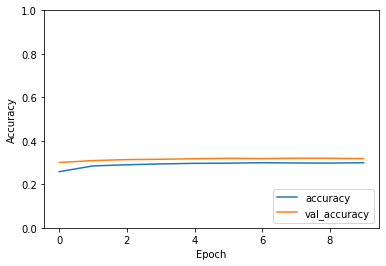

In [23]:
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

### 3. Text Classification

In [31]:
url = 'https://raw.githubusercontent.com/MiaoWang1009/ANLY590-Project/master/SPAM_detection.csv'
#https://github.com/MiaoWang1009/ANLY590-Project.git
data = pd.read_csv(url)
data.head(5)

,Message,category_val
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [32]:
x = np.asarray(data['Message'])
y = np.asarray(data['category_val'])
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)
sequence = tokenizer.texts_to_sequences(x)
X = pad_sequences(sequence, padding='post')
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

3.1 RNN


In [33]:
lstm = tfk.Sequential([
                    tfkl.Embedding(len(tokenizer.word_index)+1, 16),
                    tfkl.LSTM(16, return_sequences=True),
                    tfkl.Dense(8, activation='relu'),
                    tfkl.Dropout(0.5),
                    tfkl.Dense(1, activation='sigmoid')
])


lstm.compile(loss = 'binary_crossentropy', optimizer = 'RMSprop', metrics=['accuracy'])
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          144080    
_________________________________________________________________
lstm (LSTM)                  (None, None, 16)          2112      
_________________________________________________________________
dense_7 (Dense)              (None, None, 8)           136       
_________________________________________________________________
dropout_3 (Dropout)          (None, None, 8)           0         
_________________________________________________________________
dense_8 (Dense)              (None, None, 1)           9         
Total params: 146,337
Trainable params: 146,337
Non-trainable params: 0
_________________________________________________________________


In [34]:
results = lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
122/122 [==============================] - 9s 74ms/step - loss: 0.4725 - accuracy: 0.8572 - val_loss: 0.3749 - val_accuracy: 0.8714
Epoch 2/10
122/122 [==============================] - 9s 70ms/step - loss: 0.2490 - accuracy: 0.9430 - val_loss: 0.1548 - val_accuracy: 0.9633
Epoch 3/10
122/122 [==============================] - 9s 72ms/step - loss: 0.1651 - accuracy: 0.9718 - val_loss: 0.1264 - val_accuracy: 0.9715
Epoch 4/10
122/122 [==============================] - 9s 70ms/step - loss: 0.1334 - accuracy: 0.9767 - val_loss: 0.1104 - val_accuracy: 0.9765
Epoch 5/10
122/122 [==============================] - 9s 70ms/step - loss: 0.1055 - accuracy: 0.9808 - val_loss: 0.1188 - val_accuracy: 0.9775
Epoch 6/10
122/122 [==============================] - 9s 70ms/step - loss: 0.0970 - accuracy: 0.9818 - val_loss: 0.0853 - val_accuracy: 0.9830
Epoch 7/10
122/122 [==============================] - 9s 70ms/step - loss: 0.0865 - accuracy: 0.9828 - val_loss: 0.0739 - val_accuracy: 0.9826

Text(0.5, 1.0, 'Text RNN ROC')

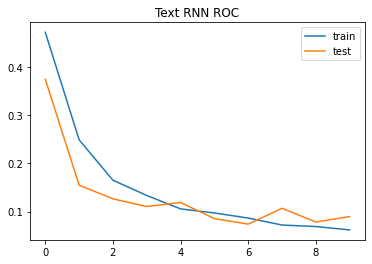

In [35]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "test"])
plt.title('Text RNN ROC')

Text(0.5, 1.0, 'Text RNN accuracy')

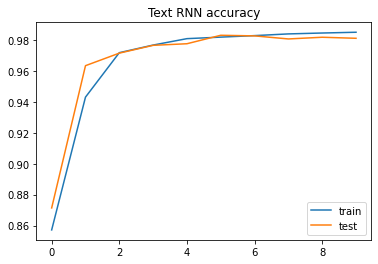

In [36]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["val_accuracy"])
plt.legend(labels=["train", "test"])
plt.title('Text RNN accuracy')

3.2 RNN

In [37]:
cnn = tfk.Sequential([
             tfkl.Embedding(len(tokenizer.word_index)+1, 16),
             tfkl.Conv1D(32,2,1,activation='relu'),
             tfkl.MaxPool1D(),
             tfkl.Dropout(0.3),
             tfkl.Conv1D(16,2,1,activation='relu'),
             tfkl.MaxPool1D(),
             tfkl.Dropout(0.3),
             tfkl.Conv1D(8,2,1,activation='relu'),
             tfkl.MaxPool1D(),
             tfkl.Dropout(0.3),
             tfkl.GlobalMaxPool1D(),
             tfkl.Dense(1, activation = 'sigmoid')
])

cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          144080    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 32)          1056      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, None, 32)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 32)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          1040      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, None, 16)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, None, 16)         

In [38]:
cnn.compile(optimizer=tfk.optimizers.RMSprop(), loss = 'binary_crossentropy', metrics=['accuracy'])

In [39]:
results = cnn.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/20
122/122 [==============================] - 2s 15ms/step - loss: 0.4200 - accuracy: 0.8590 - val_loss: 0.5065 - val_accuracy: 0.8714
Epoch 2/20
122/122 [==============================] - 2s 14ms/step - loss: 0.3997 - accuracy: 0.8636 - val_loss: 0.4831 - val_accuracy: 0.8714
Epoch 3/20
122/122 [==============================] - 2s 14ms/step - loss: 0.3999 - accuracy: 0.8636 - val_loss: 0.4663 - val_accuracy: 0.8714
Epoch 4/20
122/122 [==============================] - 2s 14ms/step - loss: 0.3935 - accuracy: 0.8636 - val_loss: 0.3918 - val_accuracy: 0.8714
Epoch 5/20
122/122 [==============================] - 2s 13ms/step - loss: 0.3594 - accuracy: 0.8636 - val_loss: 0.3098 - val_accuracy: 0.8714
Epoch 6/20
122/122 [==============================] - 2s 13ms/step - loss: 0.3078 - accuracy: 0.8636 - val_loss: 0.2666 - val_accuracy: 0.8714
Epoch 7/20
122/122 [==============================] - 2s 13ms/step - loss: 0.2635 - accuracy: 0.8636 - val_loss: 0.2300 - val_accuracy: 0.9103

Text(0.5, 1.0, 'Text CNN ROC')

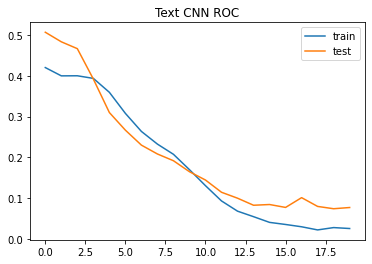

In [40]:
plt.plot(results.history["loss"])
plt.plot(results.history["val_loss"])
plt.legend(labels=["train", "test"])
plt.title('Text CNN ROC')

Text(0.5, 1.0, 'CNN Accuracy')

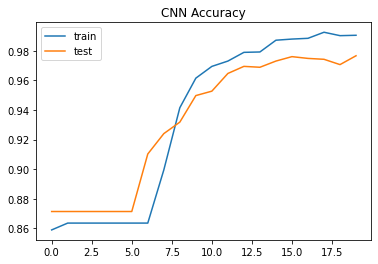

In [41]:
plt.plot(results.history["accuracy"])
plt.plot(results.history["val_accuracy"])
plt.legend(labels=["train", "test"])
plt.title('CNN Accuracy')
